[View in Colaboratory](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/part2_2.ipynb)

# 설문조사 응답분석 2
- 강좌링크: https://programmers.co.kr/learn/courses/21
- Part2.2: https://programmers.co.kr/learn/courses/21/lessons/938
- 유튜브: https://www.youtube.com/watch?v=p3msv18FIyQ


In [0]:
# 노트북 안에서 그래프 그리는 magic
%matplotlib inline

# import the standard Python Scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Isage Warnings - 워닝 지저분하게 뜨는거 표시하지 않기
import warnings
warnings.filterwarnings('ignore')


In [0]:
# Google Drive와 연결
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth

auth.authenticate_user()

from oauth2client.client import GoogleCredentials

creds = GoogleCredentials.get_application_default()

import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp95896jv_/pubring.gpg' created
gpg: /tmp/tmp95896jv_/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# 폴더를 만들어서 구글 드라이브 연동
!mkdir -p drive 
!google-drive-ocamlfuse drive 

In [2]:
cd drive/kaggle/kaggle-survey-2017/

/content/drive/kaggle/kaggle-survey-2017


In [3]:
ls -al

total 28968
drwxr-xr-x 2 root root     4096 May 21 05:21 ./
drwxr-xr-x 2 root root     4096 May 21 05:19 ../
-rw-r--r-- 1 root root     1877 May 21 05:21 conversionRates.csv
-rw-r--r-- 1 root root  4303670 May 21 05:21 freeformResponses.csv
-rw-r--r-- 1 root root 24876561 May 21 05:22 multipleChoiceResponses.csv
-rw-r--r-- 1 root root   426038 May 22 01:38 part2-1.ipynb
-rw-r--r-- 1 root root     1032 May 21 05:21 RespondentTypeREADME.txt
-rw-r--r-- 1 root root       40 May 21 08:54 saveToDrive.txt
-rw-r--r-- 1 root root    42779 May 21 05:36 schema.csv
-rw-r--r-- 1 root root        0 May 21 06:53 test2.txt
-rw-r--r-- 1 root root        0 May 21 07:53 test3.txt
-rw-r--r-- 1 root root        0 May 21 06:52 test.txt


In [4]:
questions = pd.read_csv('schema.csv')  
print(questions.head()) # 질문들이 어떤게 있나 잠시 보자
print(questions.shape)  # 어떤 모양인지 보자

             Column                                           Question Asked
0      GenderSelect     Select your gender identity. - Selected Choice   All
1    GenderFreeForm  Select your gender identity. - A different ide...   All
2           Country          Select the country you currently live in.   All
3               Age                                   What's your age?   All
4  EmploymentStatus             What's your current employment status?   All
(290, 3)


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

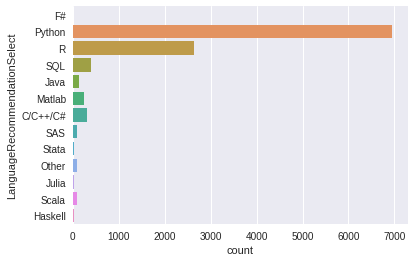

In [6]:
# R 과 Pyhon!
sns.countplot(y='LanguageRecommendationSelect', data = mcq)

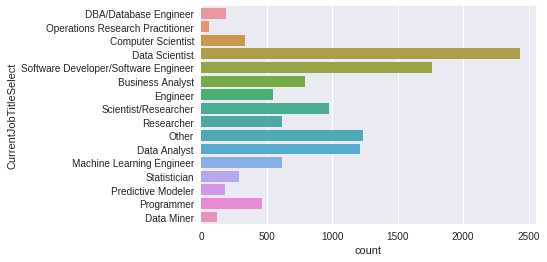

In [7]:
# 현재 하는 일은?
sns.countplot(y='CurrentJobTitleSelect', data=mcq)

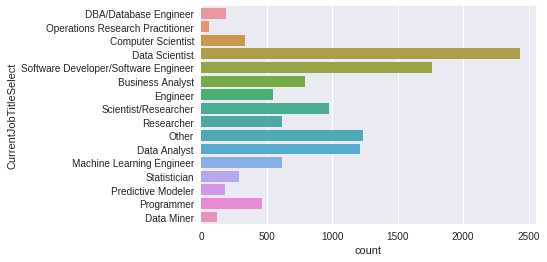

In [9]:
# 다른 방식
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [11]:
# 현재 직업 응답중 null 이 아닌것 중에서 null 이 아닌것의 응답수는? 
mcq[mcq['CurrentJobTitleSelect'].notnull()].shape[0]

11830

In [13]:
# R 과 Python 하는 사람들만 추려내고, 그 사람들의 현재 직업을 알아보자
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'R') | (mcq['LanguageRecommendationSelect'] == 'Python'))]
data.shape

(7158, 228)

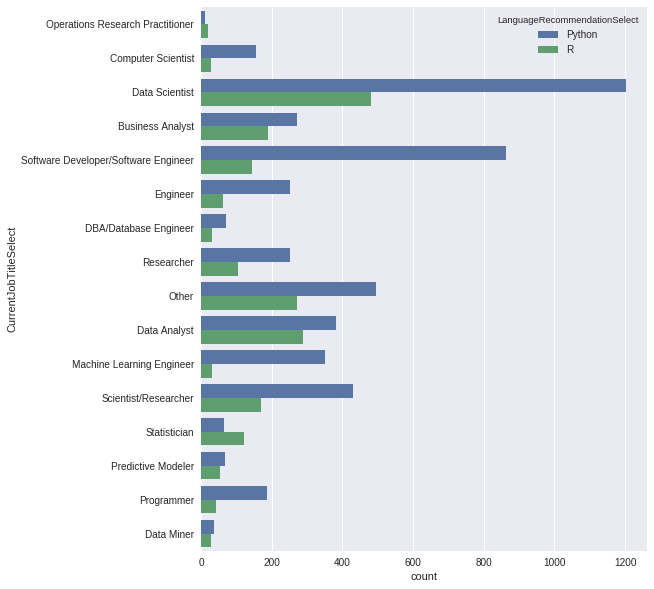

In [14]:
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

In [0]:
# 데이터 사이언티스트가 많은데 대부분 파이썬을 쓰는구나
# SW 개발자들도 파이썬을 많이 쓰는구나
# 유일하게 통계학자들 (Statistician) 만이 R을 더 많이 쓰는구나

In [0]:
# 내년의 ML 툴은?
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True) * 100).astype('int')

In [18]:
mcq_ml_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_df.columns = ["응답수", "퍼센트"]
mcq_ml_df

,응답수,퍼센트
TensorFlow,2621,23
Python,1713,15
R,910,8
Spark / MLlib,755,6
Hadoop/Hive/Pig,417,3
Other,407,3
Amazon Machine Learning,392,3
Jupyter notebooks,358,3
I don't plan on learning a new tool/technology,341,3
Google Cloud Compute,296,2


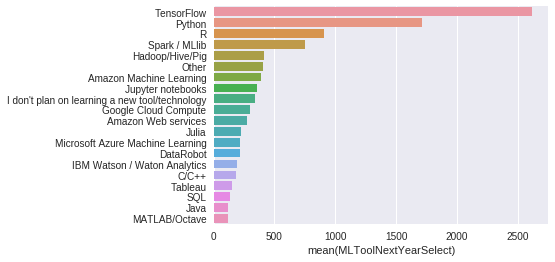

In [22]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(x=data, y=data.index)

In [23]:
data.head()

TensorFlow         2621
Python             1713
R                   910
Spark / MLlib       755
Hadoop/Hive/Pig     417
Name: MLToolNextYearSelect, dtype: int64

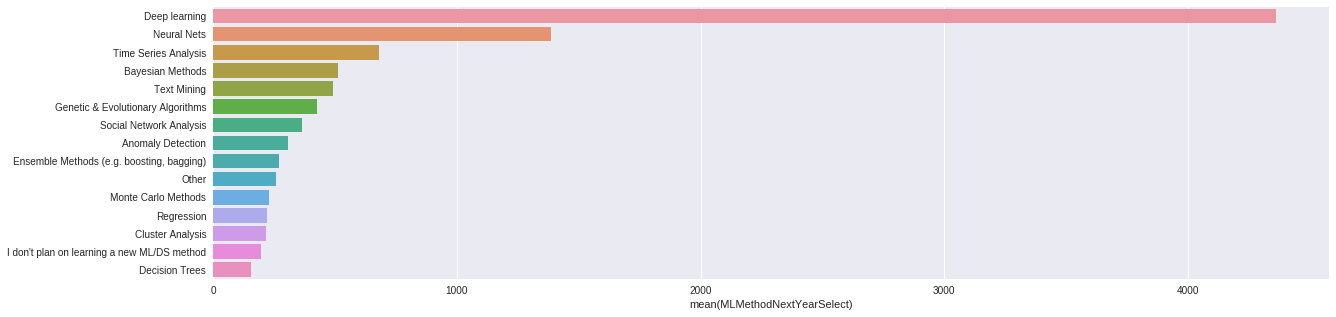

In [26]:
# 데이터 사이언스 방법은
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)

plt.figure(figsize=(20,5))
sns.barplot(x=data, y=data.index)

In [27]:
mcq['LearningPlatformSelect']  # 답이 여러개이다. 콤마를 분리해줄 필요가 있다.

0        College/University,Conferences,Podcasts,Trade ...
1                                                   Kaggle
2        Arxiv,College/University,Kaggle,Online courses...
3        Blogs,College/University,Conferences,Friends n...
4                        Arxiv,Conferences,Kaggle,Textbook
5        Kaggle,Online courses,Stack Overflow Q&A,Textbook
6            Arxiv,Blogs,Kaggle,Personal Projects,Textbook
7        College/University,Kaggle,Online courses,Stack...
8        Blogs,Company internal community,Conferences,F...
9        Arxiv,Blogs,Conferences,Kaggle,Non-Kaggle onli...
10                                   Kaggle,Online courses
11       Kaggle,Non-Kaggle online communities,Personal ...
12       College/University,Conferences,Kaggle,Online c...
13                                                     NaN
14       Blogs,Conferences,Kaggle,Online courses,Trade ...
15       Kaggle,Personal Projects,Podcasts,Stack Overfl...
16                                                     N

In [0]:
# 어디서 배우면 좋을까? - 여러개의 답이 있는경우 나눠줘야 한다. 
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'

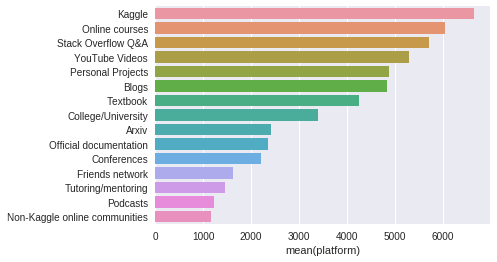

In [29]:
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [30]:
# pd.Series 가 뭘까 ? 2차원 dataframe 이 아닌 1차원 리스트 같은걸로 바꿔주는건가 보다. 
s.shape

(61904,)

In [0]:
# Kaggle 을 가장 많이 선호하지만, 설문한데가 Kaggle 이니 참고만 하자
# 유튜브, 온라인, 스택오버플로가 대학보다 상위이다.

In [32]:
# 설문내용과 누구에게 물어봤는지를 알아보자
qc = questions.loc[questions['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [36]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]
use_features
# 컬럼중에서 특정값 있는 경우를 찾는 방법인듯

[u'LearningPlatformUsefulnessArxiv',
 u'LearningPlatformUsefulnessBlogs',
 u'LearningPlatformUsefulnessCollege',
 u'LearningPlatformUsefulnessCompany',
 u'LearningPlatformUsefulnessConferences',
 u'LearningPlatformUsefulnessFriends',
 u'LearningPlatformUsefulnessKaggle',
 u'LearningPlatformUsefulnessNewsletters',
 u'LearningPlatformUsefulnessCommunities',
 u'LearningPlatformUsefulnessDocumentation',
 u'LearningPlatformUsefulnessCourses',
 u'LearningPlatformUsefulnessProjects',
 u'LearningPlatformUsefulnessPodcasts',
 u'LearningPlatformUsefulnessSO',
 u'LearningPlatformUsefulnessTextbook',
 u'LearningPlatformUsefulnessTradeBook',
 u'LearningPlatformUsefulnessTutoring',
 u'LearningPlatformUsefulnessYouTube']

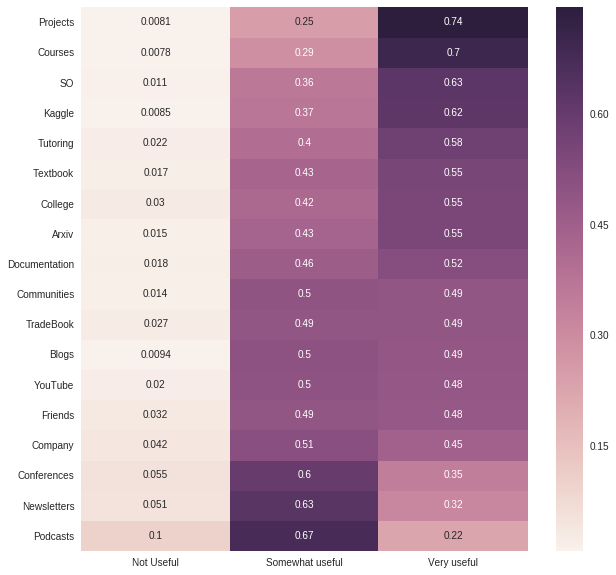

In [37]:
# 유용함에 대한 점수를 준 컬럼을 찾았다. 
# 플랫폼이 얼마나 유용한지를 체크해보자

fdf={}
for feature in use_features:
  a = mcq[feature].value_counts()  # 각 칼럼에서의 개수 카운트
  a = a/a.sum()  # 전체중에서 개수의 비율. 각 개수는 점수가 아닐까?
  fdf[feature[len('LearningPlatformUsefulness'):]] = a  # 이건 좀 어렵구만 
  
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

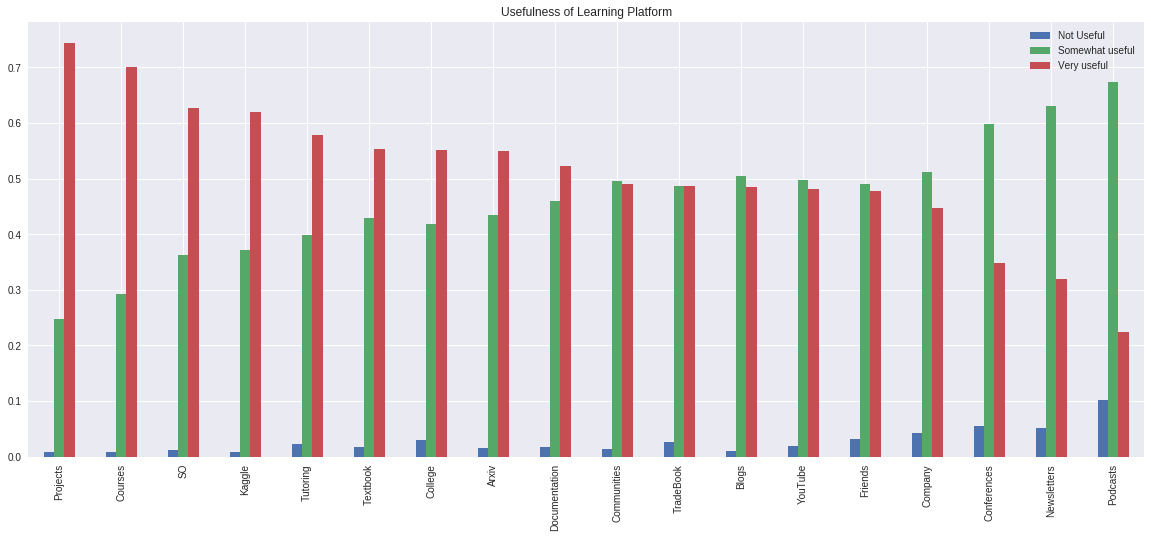

In [38]:
fdf.plot(kind='bar', figsize=(20,8), title="Usefulness of Learning Platform")

In [40]:
cat_feature = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_feature

[u'LearningCategorySelftTaught',
 u'LearningCategoryOnlineCourses',
 u'LearningCategoryWork',
 u'LearningCategoryUniversity',
 u'LearningCategoryKaggle',
 u'LearningCategoryOther']

In [41]:
len('LearningCategory')

16

In [42]:
mcq['LearningCategorySelftTaught']

0         0.0
1        10.0
2        20.0
3        30.0
4        60.0
5        45.0
6        40.0
7         0.0
8        70.0
9        10.0
10        NaN
11       10.0
12       30.0
13        NaN
14       50.0
15       50.0
16        NaN
17        NaN
18       50.0
19       50.0
20       20.0
21       30.0
22       10.0
23       55.0
24        0.0
25       10.0
26       30.0
27       20.0
28       40.0
29        NaN
         ... 
16686    10.0
16687    60.0
16688    80.0
16689     0.0
16690    34.0
16691    20.0
16692    70.0
16693    25.0
16694    35.0
16695    15.0
16696     NaN
16697    40.0
16698    10.0
16699     NaN
16700    40.0
16701    30.0
16702    40.0
16703    30.0
16704     0.0
16705     NaN
16706    80.0
16707     NaN
16708     NaN
16709    20.0
16710     NaN
16711    20.0
16712    10.0
16713     NaN
16714     NaN
16715     NaN
Name: LearningCategorySelftTaught, Length: 16716, dtype: float64

In [43]:
mcq['LearningCategorySelftTaught'].mean()

33.36677092074147

In [44]:
cdf = {}  # 중괄호는 딕셔너리 이다. 
for feature in cat_feature:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)
cdf
  


Kaggle            5.531434
OnlineCourses    27.375514
Other             1.795940
SelftTaught      33.366771
University       16.988607
Work             15.217593
dtype: float64

In [48]:
'LearningCategorySelftTaught'[16:]  # 아하 카테고리의 앞부분을 잘라낸 것이구나

'SelftTaught'

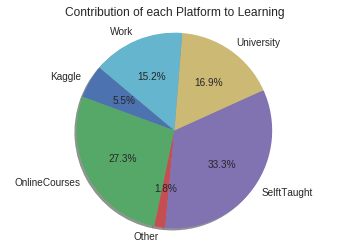

In [49]:
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [52]:
# 데이터 과학은 컴터가 빵빵해야 하는가?
# 이 질문은 누구에게 물어봤나?

qc = questions.loc[questions['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [68]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(16716,)

In [0]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x : x.split(','))

s = mcq.apply(lambda x: 
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [0]:
s = s[s != 'nan']

In [71]:
pd.DataFrame(s.value_counts())

,hardware
"['[\'[""[\\\'nan\\\']""]\']']",12510
"['[\'[""[\\\'Basic laptop (Macbook)\\\']""]\']']",1713
"' \' "" \\\' Azure\\\'""\''",669
"' \' "" \\\' GCE ...)\\\']""]\']']",560
"['[\'[""[\\\'Basic laptop (Macbook)\\\'""\''",533
"['[\'[""[\\\'Gaming Laptop (Laptop + CUDA capable GPU)\\\']""]\']']",427
"['[\'[""[\\\'Laptop + Cloud service (AWS\\\'""\''",363
"' \' "" \\\'Laptop + Cloud service (AWS\\\'""\''",306
"['[\'[""[\\\'Traditional Workstation\\\']""]\']']",304
"['[\'[""[\\\'Laptop or Workstation and local IT supported servers\\\']""]\']']",268


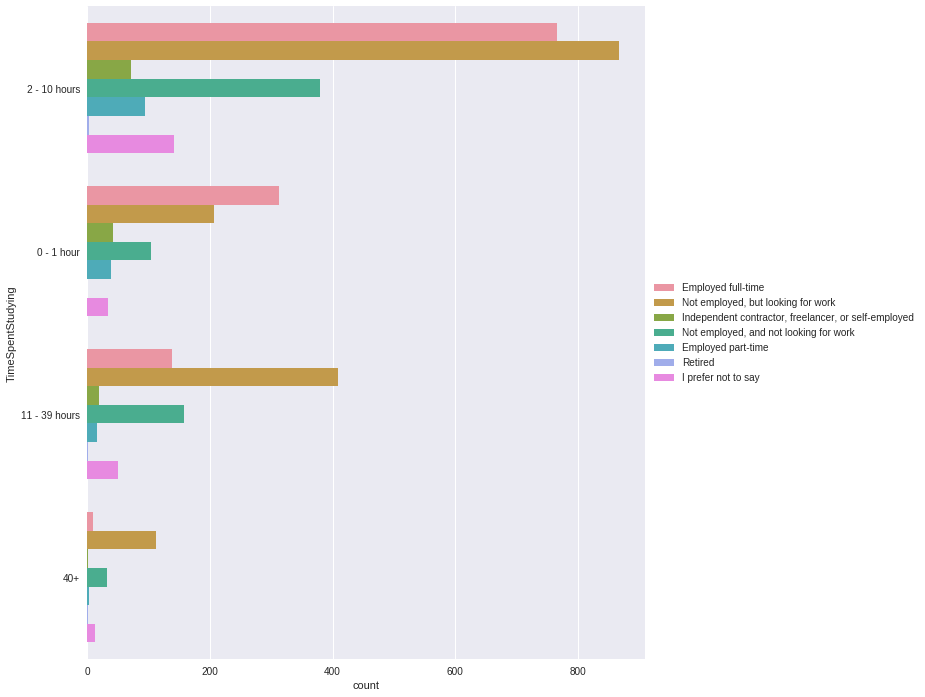

In [72]:
# 데이터 사이언스 공부시간
plt.figure(figsize=(10,12))
sns.countplot(y='TimeSpentStudying', data=mcq,
             hue="EmploymentStatus").legend(loc="center left",
                                           bbox_to_anchor=(1,0.5))

In [74]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape[0])
looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape[0])

10897
2110


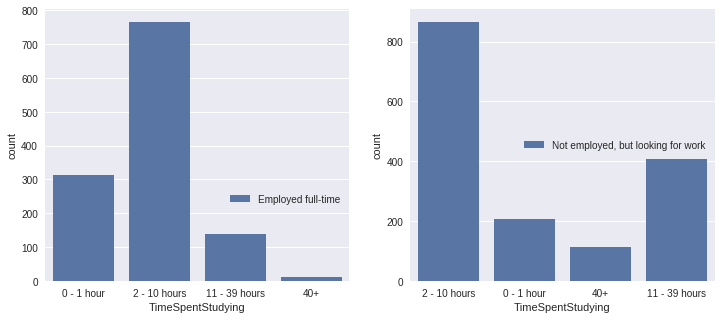

In [78]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x="TimeSpentStudying", data=full_time, hue="EmploymentStatus", ax=ax1).legend(loc='center right', bbox_to_anchor=(1,0.3))
sns.countplot(x="TimeSpentStudying", data=looking_for_job, hue="EmploymentStatus", ax=ax2).legend(loc='center right', bbox_to_anchor=(1,0.5))